<h1><b>TSF task 2</b></h1>
Iris dataset classification by using kmeans clustering


<b>K-Means</b>


K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.



In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
import sklearn.metrics as sm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN 
from sklearn.decomposition import PCA 
%matplotlib inline

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

<h2><b>Using Kmeans to determine the cluster</b></h2>

C:\Users\kaust\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
No handles with labels found to put in legend.


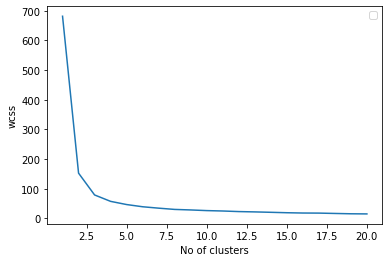

In [3]:
wcss = []

for i in range(1,21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)

plt.plot(range(1,21), wcss)
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.legend()
plt.show()

#3 ar 4 for the value of k by elbow method

<h2><b>Using Principal Component Ananlysis to determine the useful features</b></h2>

In [4]:
pca = PCA(n_components=4)
pca.fit(X)
print('Variance Ratio : ',pca.explained_variance_ratio_)
print('Singular Value Ratio :' ,pca.singular_values_)

Variance Ratio :  [0.92461872 0.05306648 0.01710261 0.00521218]
Singular Value Ratio : [25.09996044  6.01314738  3.41368064  1.88452351]


<h3><b>Plotting</b></h3>

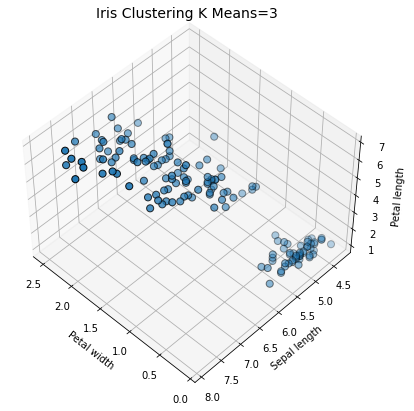

In [5]:
#Plotting
fig = plt.figure(1, figsize=(7,5))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("Iris Clustering K Means=3", fontsize=14)
plt.show()

In [6]:
X_data = pd.DataFrame(data = X , columns=['Petal Length', 'Petal Width', 'Sepal Length', 'Sepal Width'])
y_target = pd.DataFrame(data = y, columns = ['targets'])


In [7]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_data)

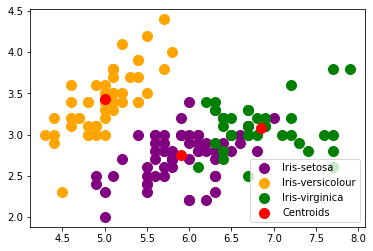

In [8]:
x_data = X_data.iloc[:, [0, 1, 2, 3]].values

plt.scatter(x_data[y_kmeans == 0, 0], x_data[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x_data[y_kmeans == 1, 0], x_data[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x_data[y_kmeans == 2, 0], x_data[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()
plt.show()

<h3><b>Submitted by</b></h3>
<h4>Kaustuva kumar Sahu</h4>

<h2><b>Thank You</b></h2>